In [3]:
import pandas as pd

In [ ]:
l_orderkey, l_partkey, l_suppkey, l_linenumber, l_quantity: decimal(12,2) (nullable = true)
    // |-- l_extendedprice: decimal(12,2) (nullable = true)
    // |-- l_discount: decimal(12,2) (nullable = true)
    // |-- l_tax: decimal(12,2) (nullable = true)
    // |-- l_returnflag: string (nullable = true)
    // |-- l_linestatus: string (nullable = true)
    // |-- l_shipdate: date (nullable = true)
    // |-- l_commitdate: date (nullable = true)
    // |-- l_receiptdate: date (nullable = true)
    // |-- l_shipinstruct: string (nullable = true)
    // |-- l_shipmode: string (nullable = true)
    // |-- l_comment:

In [7]:
lineitem = pd.read_csv("lineitem.tbl", sep='|', index_col=False, 
            names=['l_orderkey', 'l_partkey', 'l_suppkey', 'l_linenumber', 'l_quantity', 
                 'l_extendedprice', 'l_discount', 'l_tax', 'l_returnflag', 'l_linestatus',
                'l_shipdate', 'l_commitdate', 'l_receiptdate', 'l_shipinstruct', 'l_shipmode',
                'l_comment'])

In [10]:
lineitem.head()

,l_orderkey,l_partkey,l_suppkey,l_linenumber,l_quantity,l_extendedprice,l_discount,l_tax,l_returnflag,l_linestatus,l_shipdate,l_commitdate,l_receiptdate,l_shipinstruct,l_shipmode,l_comment
0,1,15519,785,1,17,24386.67,0.04,0.02,N,O,1996-03-13,1996-02-12,1996-03-22,DELIVER IN PERSON,TRUCK,egular courts above the
1,1,6731,732,2,36,58958.28,0.09,0.06,N,O,1996-04-12,1996-02-28,1996-04-20,TAKE BACK RETURN,MAIL,ly final dependencies: slyly bold
2,1,6370,371,3,8,10210.96,0.10,0.02,N,O,1996-01-29,1996-03-05,1996-01-31,TAKE BACK RETURN,REG AIR,"riously. regular, express dep"
3,1,214,465,4,28,31197.88,0.09,0.06,N,O,1996-04-21,1996-03-30,1996-05-16,NONE,AIR,lites. fluffily even de
4,1,2403,160,5,24,31329.60,0.10,0.04,N,O,1996-03-30,1996-03-14,1996-04-01,NONE,FOB,pending foxes. slyly re


In [35]:
lineitem.dtypes

l_orderkey           int64
l_partkey            int64
l_suppkey            int64
l_linenumber         int64
l_quantity           int64
l_extendedprice    float64
l_discount         float64
l_tax              float64
l_returnflag        object
l_linestatus        object
l_shipdate          object
l_commitdate        object
l_receiptdate       object
l_shipinstruct      object
l_shipmode          object
l_comment           object
dtype: object

In [36]:
lineitem.shape

(600572, 16)

In [42]:
for col in sorted(lineitem.columns): # quantity, discount, shipmode
    print(col, lineitem[col].nunique())

l_comment 538684
l_commitdate 2466
l_discount 11
l_extendedprice 130792
l_linenumber 7
l_linestatus 2
l_orderkey 150000
l_partkey 20000
l_quantity 50
l_receiptdate 2547
l_returnflag 3
l_shipdate 2525
l_shipinstruct 4
l_shipmode 7
l_suppkey 1000
l_tax 9


In [40]:
lineitem.groupby(['l_commitdate', 'l_receiptdate']).ngroups

301692

In [45]:
lineitem.groupby(['l_orderkey', 'l_suppkey']).ngroups

599389

In [46]:
lineitem.groupby(['l_orderkey', 'l_partkey', 'l_suppkey']).ngroups

600555

In [38]:
for col in lineitem.columns:
    print(col, lineitem[col].value_counts())

l_orderkey 501411    7
350401    7
352325    7
191970    7
41831     7
413856    7
485511    7
284770    7
481409    7
33635     7
35682     7
581284    7
20576     7
107335    7
392960    7
86080     7
109382    7
384772    7
113476    7
147490    7
153633    7
151584    7
223239    7
348352    7
346176    7
219137    7
555365    7
85697     7
344770    7
521537    7
         ..
200387    1
326914    1
75398     1
73345     1
465569    1
200551    1
206085    1
256992    1
2210      1
73863     1
67714     1
209444    1
69761     1
205350    1
207399    1
27429     1
401511    1
201987    1
2627      1
197889    1
407652    1
19233     1
125856    1
469062    1
208739    1
78436     1
460866    1
202596    1
537703    1
551392    1
Name: l_orderkey, Length: 150000, dtype: int64
l_partkey 10620    56
6140     54
8051     52
15584    52
10597    51
2292     51
10715    51
3225     50
17670    50
14422    50
19444    50
9357     49
15215    49
16348    49
2537     49
8554     49
11356   

l_comment  carefully                                     98
 furiously                                     92
 carefully                                     92
carefully                                      91
 furiously                                     86
furiously                                      70
ly regular                                     62
 blithely                                      61
y regular                                      58
 accounts                                      48
 deposits                                      47
e furiousl                                     47
e carefully                                    46
ly regular                                     46
 requests                                      44
ly ironic                                      44
 packages                                      44
pinto bean                                     40
e carefull                                     39
 theodolite                             

In [23]:
lineitem['l_returnflag'].apply(lambda x: str(x)).value_counts()

N    304481
R    148301
A    147790
Name: l_returnflag, dtype: int64

In [24]:
lineitem['l_linestatus'].apply(lambda x: str(x)).value_counts()

O    300716
F    299856
Name: l_linestatus, dtype: int64

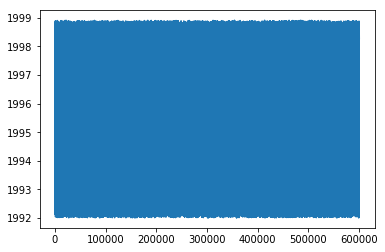

In [30]:
pd.to_datetime(lineitem['l_shipdate']).plot()

Cannot plot column l_returnflag
Cannot plot column l_linestatus
Cannot plot column l_shipdate
Cannot plot column l_commitdate
Cannot plot column l_receiptdate
Cannot plot column l_shipinstruct
Cannot plot column l_shipmode
Cannot plot column l_comment


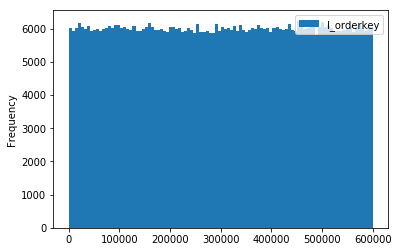

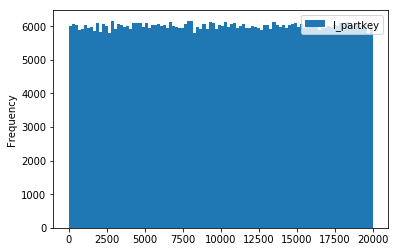

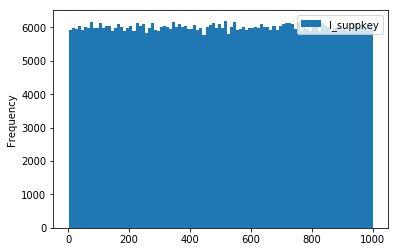

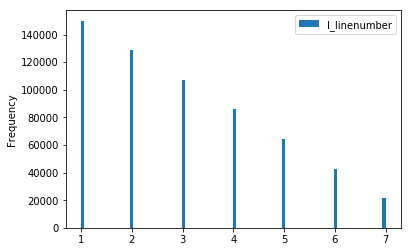

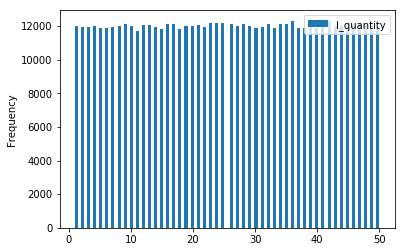

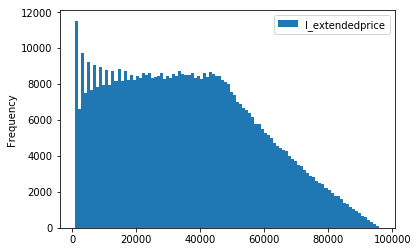

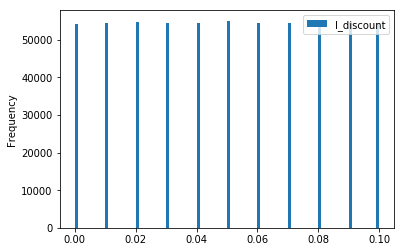

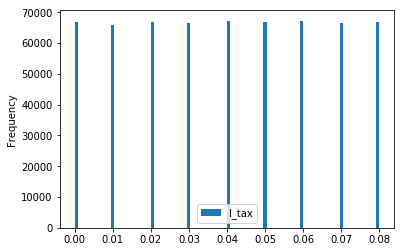

In [13]:
for col in lineitem.columns:
    try:
        lineitem[[col]].plot.hist(bins=100)
    except:
        print("Cannot plot column {}".format(col))

In [21]:
lineitem['l_returnflag'].apply(lambda x: str(x)).value_counts()

N    304481
R    148301
A    147790
Name: l_returnflag, dtype: int64